<a href="https://colab.research.google.com/github/OgunSerifOnargan/VodoVest/blob/main/RomanEmperors_VBM661_MT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import math
import io
import matplotlib.pyplot as plt
import sys
from matplotlib.patches import Rectangle
from seaborn import violinplot, boxplot
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)
from google.colab import files

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-08-13/emperors.csv'
df = pd.read_csv(url,encoding="latin1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        68 non-null     int64 
 1   name         68 non-null     object
 2   name_full    68 non-null     object
 3   birth        63 non-null     object
 4   death        68 non-null     object
 5   birth_cty    51 non-null     object
 6   birth_prv    68 non-null     object
 7   rise         68 non-null     object
 8   reign_start  68 non-null     object
 9   reign_end    68 non-null     object
 10  cause        68 non-null     object
 11  killer       68 non-null     object
 12  dynasty      68 non-null     object
 13  era          68 non-null     object
 14  notes        46 non-null     object
 15  verif_who    11 non-null     object
dtypes: int64(1), object(15)
memory usage: 8.6+ KB


In [4]:
def delta_t(df, col1, col2):
  val1 = []
  val2 = []
  for i in range(len(df[col1])):
    if pd.isna(df[col1][i]):
      pass
    else:
      str_date = str(df[col1][i])
      year = int(str_date[:4])
      month = int(str_date[5:7])
      day = int(str_date[8:])
      totalDay1 = year*365 + month*30 +day
    
    if pd.isna(df[col2][i]):
      pass
    else:
      str_date = str(df[col2][i])
      year = int(str_date[:4])
      month = int(str_date[5:7])
      day = int(str_date[8:])
      totalDay2 = year*365 + month*30 +day
    if totalDay1 >= totalDay2:
      totalDay1 = -1 * totalDay1

    val1.append(totalDay1)
    val2.append(totalDay2)

  df[col1 + "_deltaT"] = val1
  df[col2 + "_deltaT"] = val2

delta_t(df, "birth", "death")
delta_t(df, "reign_start", "reign_end")

df["reign_length"] = (df["reign_end_deltaT"] - df["reign_start_deltaT"])/365
df["life_span"] = (df["death_deltaT"] - df["birth_deltaT"])/365
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

temp_start=[]
temp_end=[]
for i in range(len(df)):
  str_start = str(df["reign_start"][i])
  year_start = int(str_start[:4])
  temp_start.append(year_start)

  str_end = str(df["reign_end"][i])
  year_end = int(str_end[:4])
  temp_end.append(year_end)
df["reign_start_year"] = temp_start
df["reign_end_year"] = temp_end
df.reign_start_year[0] = df.reign_start_year[0] * -1

def arrange_index(index):
  x=[]
  for i in range(len(index)):   
    x.append(index[i].split(' '))   
  for j in range(len(x)):
    for k in range(len(x[j])-1):
      x[j].insert(2*k+1, "\n")

  for i in range(len(x)):
    index[i] = " ".join(x[i])

indexa = df.groupby(["rise"])["reign_length"].count().sort_values(ascending=False).index.tolist()
indexb = df.groupby(["cause"])["reign_length"].count().sort_values(ascending=False).index.tolist()
indexc = df.groupby(["killer"])["reign_length"].count().sort_values(ascending=False).index.tolist()
indexd = df.groupby(["birth_prv"])["reign_length"].count().sort_values(ascending=False).index.tolist()

arrange_index(indexa)
arrange_index(indexb)
arrange_index(indexc)
arrange_index(indexd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

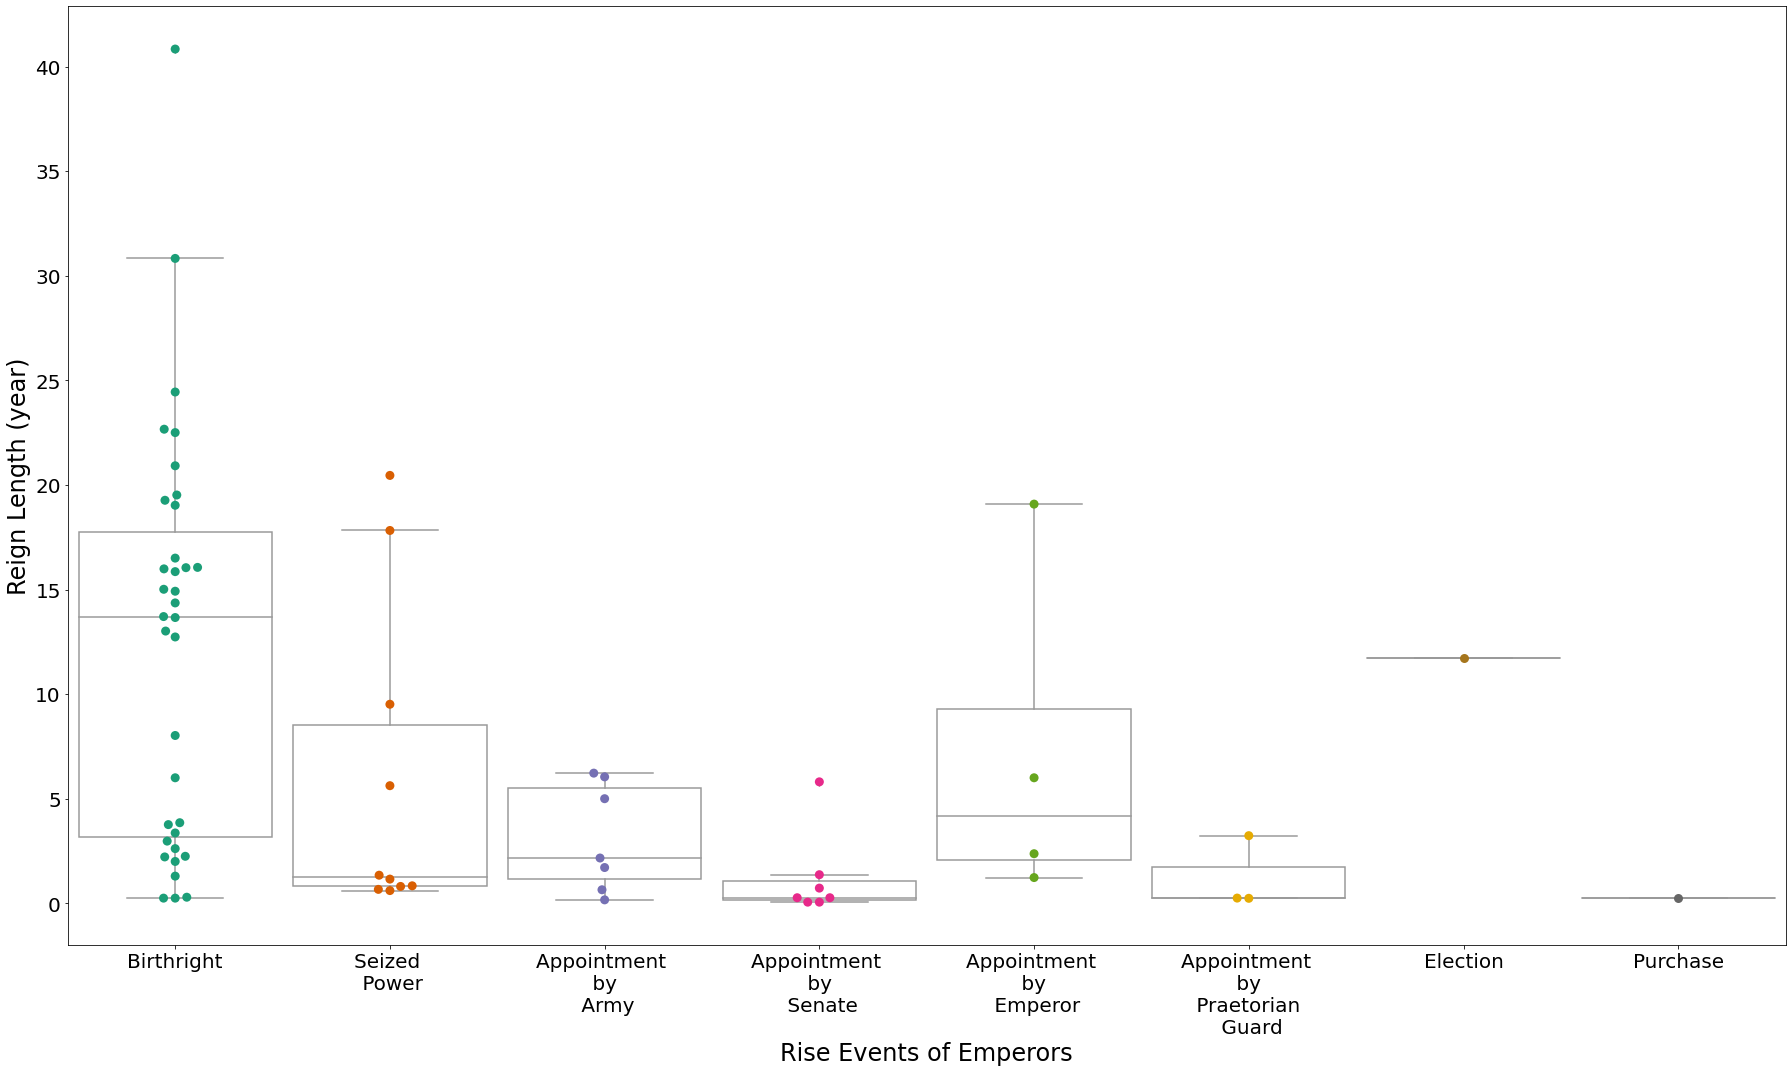

In [7]:
figure, ax1 = plt.subplots(1, 1, figsize=(25, 15))
sns.boxplot(x=df["rise"],y=df["reign_length"], color="1", width=0.9, ax=ax1, order=df.groupby(["rise"])["reign_length"].count().sort_values(ascending=False).index)
sns.swarmplot(x=df["rise"],y=df["reign_length"],palette="Dark2", ax=ax1, size=9, order=df.groupby(["rise"])["reign_length"].count().sort_values(ascending=False).index)
ax1.set_xticklabels(indexa, rotation=0, fontsize=20)
ax1.set_yticklabels(range(-5,50,5),rotation=0, fontsize=20)
ax1.set_xlabel("Rise Events of Emperors", fontsize=24)
ax1.set_ylabel("Reign Length (year)", fontsize=24)

plt.tight_layout() 
from google.colab import files
plt.savefig("graph1", dpi=500, bbox_inches="tight")
files.download("graph1.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

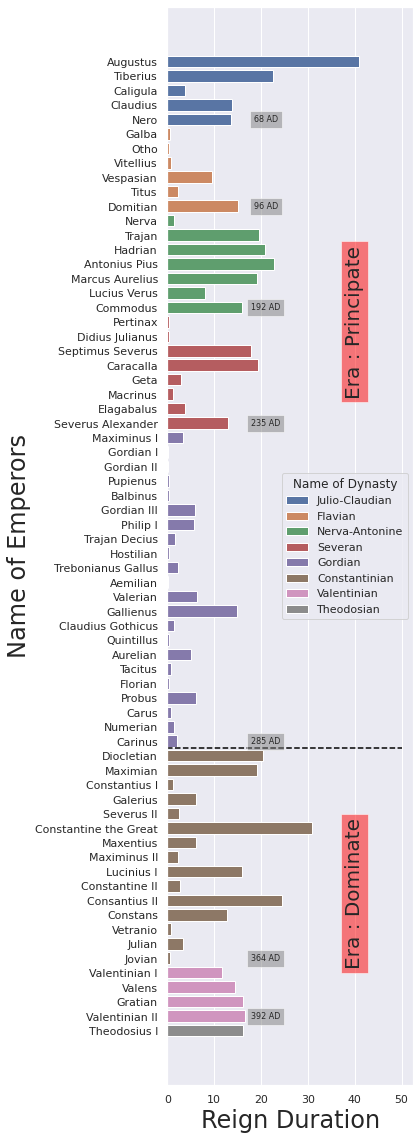

In [8]:
for i in range(len(df)-1):
  if (df["era"][i] == "Principate" and df["era"][i+1] == "Dominate"):
    ypos=(i + 0.5)
  else:
    pass
dynasty_change=[]
dynasty_change_index=[]
for i in range(len(df)):
  if i>1:
    if df["dynasty"][i]!=df["dynasty"][i-1]:
      dynasty_change.append(df["reign_end_year"][i-1])
      dynasty_change_index.append(i-1)
    else:
      pass
  else:
    pass

sns.set_style("whitegrid")
sns.set()
fig, ax = plt.subplots(figsize=(6, 16))
sns.barplot(x="reign_length", y="name", data=df, hue="dynasty", dodge=False)
plt.plot([0,50], [ypos,ypos], linestyle = 'dashed', color="black")
ax.text(40, 18, rotation="vertical", s="Era : Principate", fontsize=20, 
        bbox = dict(facecolor = 'red', alpha = 0.5), horizontalalignment="center", verticalalignment="center")
ax.text(40, 57.5, rotation="vertical", s="Era : Dominate", fontsize=20,
        bbox = dict(facecolor = 'red', alpha = 0.5), horizontalalignment="center", verticalalignment="center")
for i in range(len(dynasty_change_index)):

  ax.text(21, dynasty_change_index[i], s= str(dynasty_change[i])+" AD", fontsize=8, bbox = dict(facecolor = 'grey', alpha = 0.5), horizontalalignment="center", verticalalignment="center")
plt.xlabel("Reign Duration", fontsize=24)
plt.ylabel("Name of Emperors", fontsize=24)
plt.legend(title="Name of Dynasty",loc='center right')
plt.tight_layout() 
plt.savefig("graph2", dpi=500, bbox_inches="tight")
files.download("graph2.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

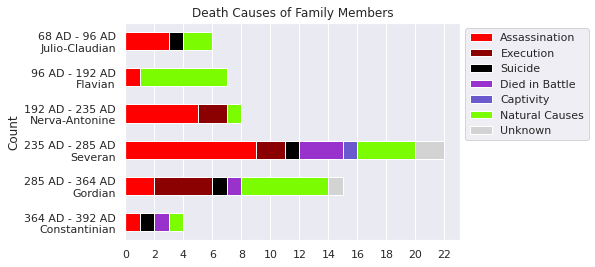

In [10]:
dynasty_interval_label=[]
dynasty_interval=[]
dynasty_name = df["dynasty"].unique()
for i in range(len(dynasty_change)):
  if i<(len(dynasty_change)-1):
    if dynasty_change[i]<0:
      dynasty_interval_label.append(str(dynasty_change[i]) + " BC" + " - " + str(dynasty_change[i+1]) + " AD" + "\n" + str(dynasty_name[i]))
    if dynasty_change[i]>0:
      dynasty_interval_label.append(str(dynasty_change[i]) + " AD" + " - " + str(dynasty_change[i+1]) + " AD" + "\n" + str(dynasty_name[i]))
    dynasty_interval.append([dynasty_change[i],dynasty_change[i+1]])

counts = [[], [], [], [], [], [], []]
deaths_lst = df["cause"].unique()

for i in range(len(deaths_lst)):
    for j in range(len(dynasty_interval)):
        counts[i].append(
            len(df["cause"][(df["cause"] == deaths_lst[i])
                                  & (dynasty_interval[j][0]+1 <= df["reign_end_year"]) &
                                  (df["reign_end_year"] <= dynasty_interval[j][1])]))
assassination, suicide, naturalCauses, execution, diedinBattle, captivity, unknown = counts

df_dynasty = pd.DataFrame(counts, columns=dynasty_interval_label, index=df["cause"].unique()).transpose()
df_dynasty = df_dynasty[::-1]
df_dynasty_ordered=df_dynasty[["Assassination","Execution","Suicide","Died in Battle","Captivity","Natural Causes","Unknown"]]
df_dynasty_ordered
color=["red","darkred","black","darkorchid","slateblue", "lawngreen","lightgrey"]
ax=df_dynasty_ordered.plot(kind="barh", stacked=True, color=color, ylabel='Dynasty', xlabel="Count",
                title='Death Causes of Family Members')
ax.set_xticks(ticks=list(range(0,23,2)))
ax.grid(axis = 'y')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.savefig("graph3", dpi=500, bbox_inches="tight")
files.download("graph3.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

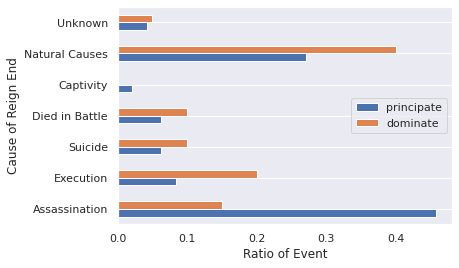

In [12]:
df_principate=df[df["era"]=="Principate"]
df_dominate = df[df["era"]=="Dominate"]
ass_pr_mean = df_principate[df_principate["cause"]=="Assassination"]["name"].count()/len(df_principate)
ass_do_mean = df_dominate[df_dominate["cause"]=="Assassination"]["name"].count()/len(df_dominate)
exe_pr_mean = df_principate[df_principate["cause"]=="Execution"]["name"].count()/len(df_principate)
exe_do_mean = df_dominate[df_dominate["cause"]=="Execution"]["name"].count()/len(df_dominate)
sui_pr_mean = df_principate[df_principate["cause"]=="Suicide"]["name"].count()/len(df_principate)
sui_do_mean = df_dominate[df_dominate["cause"]=="Suicide"]["name"].count()/len(df_dominate)
bat_pr_mean = df_principate[df_principate["cause"]=="Died in Battle"]["name"].count()/len(df_principate)
bat_do_mean = df_dominate[df_dominate["cause"]=="Died in Battle"]["name"].count()/len(df_dominate)
cap_pr_mean = df_principate[df_principate["cause"]=="Captivity"]["name"].count()/len(df_principate)
cap_do_mean = df_dominate[df_dominate["cause"]=="Captivity"]["name"].count()/len(df_dominate)
nc_pr_mean = df_principate[df_principate["cause"]=="Natural Causes"]["name"].count()/len(df_principate)
nc_do_mean = df_dominate[df_dominate["cause"]=="Natural Causes"]["name"].count()/len(df_dominate)
un_pr_mean = df_principate[df_principate["cause"]=="Unknown"]["name"].count()/len(df_principate)
un_do_mean = df_dominate[df_dominate["cause"]=="Unknown"]["name"].count()/len(df_dominate)

mean_collect = []
mean_collect.append([ass_pr_mean,ass_do_mean])
mean_collect.append([exe_pr_mean,exe_do_mean])
mean_collect.append([sui_pr_mean,sui_do_mean])
mean_collect.append([bat_pr_mean,bat_do_mean])
mean_collect.append([cap_pr_mean,cap_do_mean])
mean_collect.append([nc_pr_mean,nc_do_mean])
mean_collect.append([un_pr_mean,un_do_mean])

df_mean_collect = pd.DataFrame(mean_collect, columns=["principate","dominate"], 
                               index=["Assassination","Execution","Suicide","Died in Battle","Captivity","Natural Causes","Unknown"])

df_mean_collect.plot(kind="barh")
plt.grid(axis="x")
plt.xlabel("Ratio of Event")
plt.ylabel("Cause of Reign End")
plt.savefig("graph4", dpi=500, bbox_inches="tight")
files.download("graph4.png") 